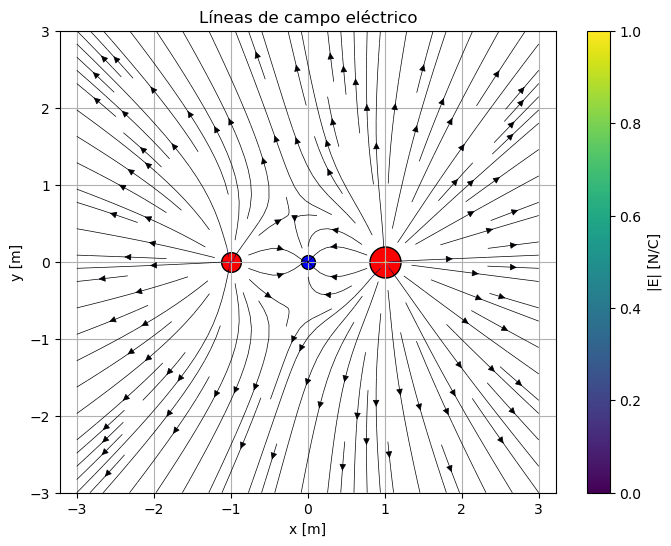

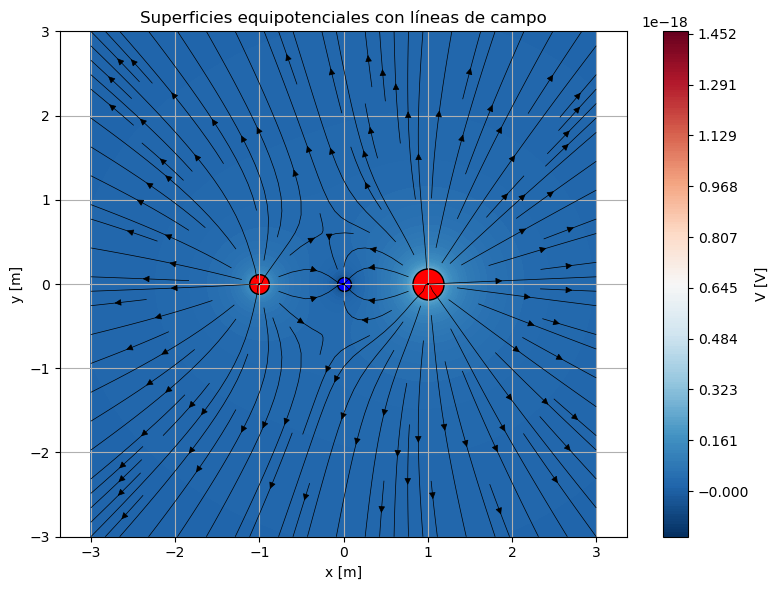

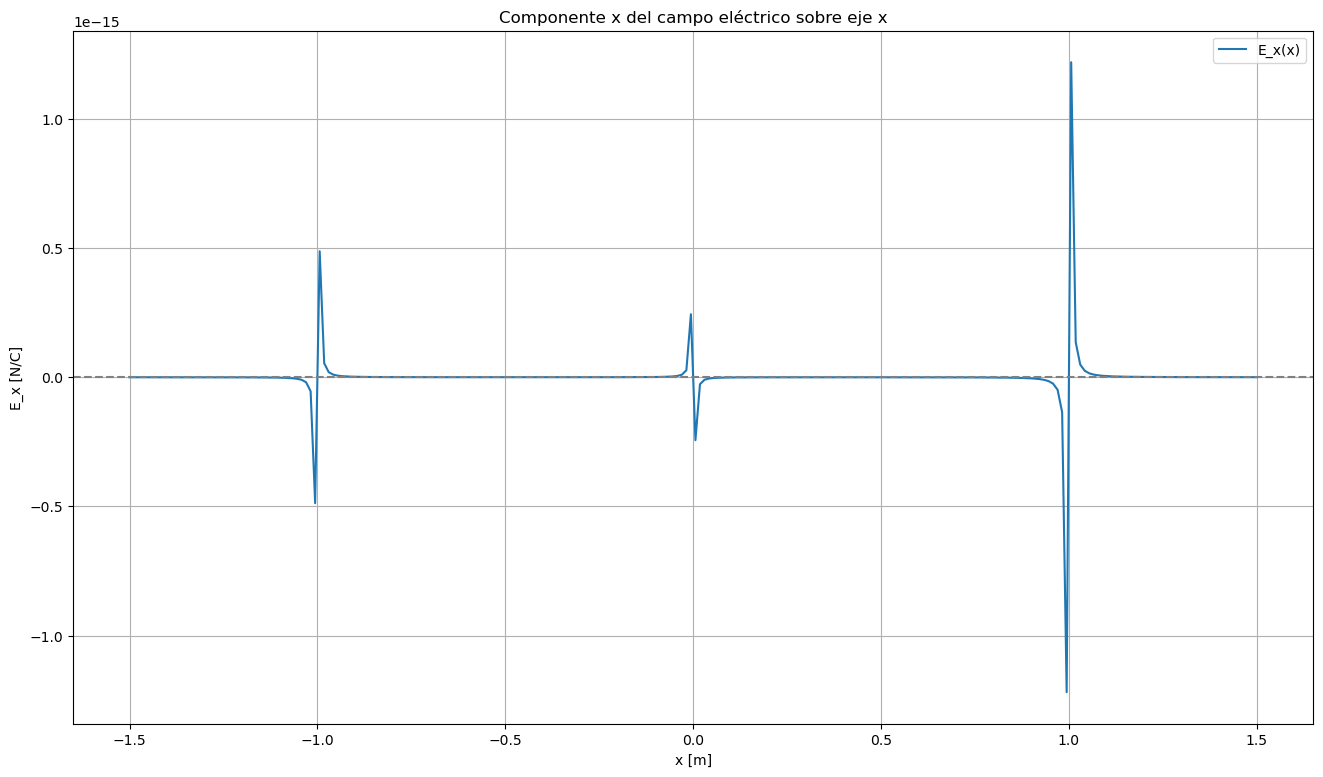

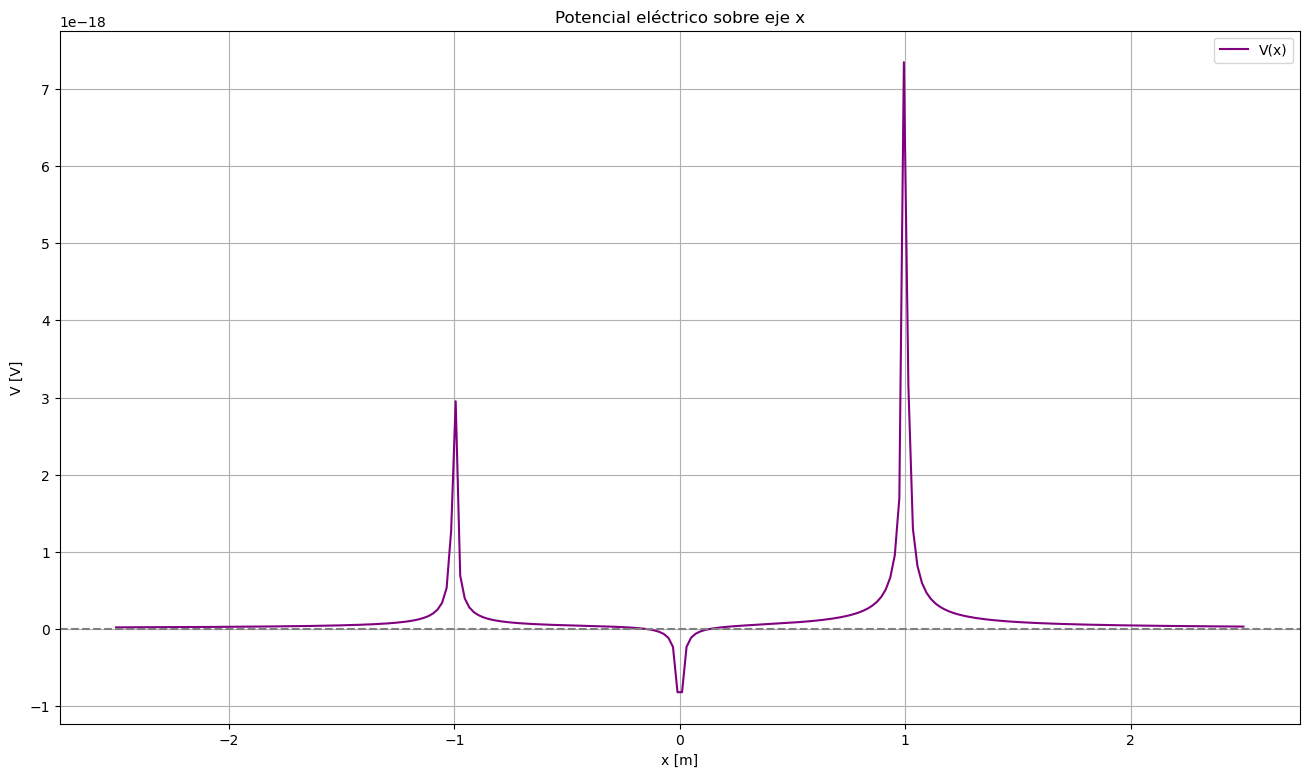

In [30]:
import matplotlib.pyplot as plt
import numpy as np

k = 8.85e-12 #permitividad del vacio

cargas = [
    (-1.0, 0.0, 2e-9), # Carga positiva (proton)
    (0.0, 0.0, -1e-9), # Carga negativa (electron)
    (1.0, 0.0, 5e-9) # Carga auxiliar positiva
]

# Creacion de la grilla
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x,y)

Ex = np.zeros_like(X)
Ey = np.zeros_like(Y)
V = np.zeros_like(X)

# Calculamos campo y potencial
for (xq, yq, q) in cargas:
    Rx = X - xq
    Ry = Y - yq
    R = np.sqrt(Rx**2 + Ry**2)
    R[R == 0] = 1e-9  # Evitar divisiones por cero

    Ex += k * q * Rx / R**3
    Ey += k * q * Ry / R**3
    V += k * q / R

    # Campo total (magnitud)
E_mag = np.sqrt(Ex**2 + Ey**2)

# Grafico de lineas de campo 
plt.figure(figsize=(8, 6))
plt.streamplot(X, Y, Ex, Ey, color=E_mag, cmap='inferno', density=1.2, linewidth=0.5, arrowsize=1)
for (xq, yq, q) in cargas:
    color = 'red' if q > 0 else 'blue'
    plt.scatter(xq, yq, c=color, s=100 * abs(q) / 1e-9, edgecolors='k')
plt.title("Líneas de campo eléctrico")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.colorbar(label="|E| [N/C]")
plt.axis('equal')
plt.grid(True)
plt.show()

# Grafico de lineas equipotenciales 
plt.figure(figsize=(8, 6))

# Ajuste fino del numero de niveles y color
levels = np.linspace(np.min(V), np.max(V), 200)  
cont = plt.contourf(X, Y, V, levels=levels, cmap='RdBu_r')

# Superponemos líneas de campo (opcional, ayuda a interpretar)
plt.streamplot(X, Y, Ex, Ey, color='k', density=1.2, linewidth=0.5, arrowsize=1)

# Dibujamos las cargas
for (xq, yq, q) in cargas:
    color = 'red' if q > 0 else 'blue'
    plt.scatter(xq, yq, c=color, s=100 * abs(q) / 1e-9, edgecolors='k')

plt.title("Superficies equipotenciales con líneas de campo")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.colorbar(cont, label="V [V]")
plt.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()


# ---------- Graficar E(x) y V(x) sobre el eje x ----------
x_line_to_Ex = np.linspace(-1.5, 1.5, 250)
x_line_to_V = np.linspace(-2.5, 2.5, 250)
Ex_line = np.zeros_like(x_line_to_Ex)
V_line = np.zeros_like(x_line_to_V)
y0 = 0.0

for (xq, yq, q) in cargas:
    dx = x_line_to_Ex - xq
    r = np.sqrt(dx**2 + (y0 - yq)**2)
    r[r == 0] = 1e-9
    Ex_line += k * q * dx / r**3


for (xq, yq, q) in cargas:
    dx = x_line_to_V - xq
    r = np.sqrt(dx**2 + (y0 - yq)**2)
    r[r == 0] = 1e-9
    V_line += k * q / r

# Campo E(x)
plt.figure(figsize=(16,9))
plt.plot(x_line_to_Ex, Ex_line, label="E_x(x)")
plt.axhline(0, color='gray', linestyle='--')
plt.title("Componente x del campo eléctrico sobre eje x")
plt.xlabel("x [m]")
plt.ylabel("E_x [N/C]")
plt.grid(True)
plt.legend()
plt.show()

# Potencial V(x)
plt.figure(figsize=(16,9))
plt.plot(x_line_to_V, V_line, label="V(x)", color='purple')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Potencial eléctrico sobre eje x")
plt.xlabel("x [m]")
plt.ylabel("V [V]")
plt.grid(True)
plt.legend()
plt.show()
